# Scikit-learn


In this tutorial, we will build a model with the Python [`scikit-learn`](https://scikit-learn.org/stable/) module. Additionally, you will learn how to create a data preprocessing pipline.

# Data preparation

In [107]:
# See notebook "Data Exploration" for details about data preprocessing
from case_duke_data_prep import *

## Data preprocessing pipeline

In [108]:
# Modules
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn import set_config
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [109]:
# for numeric features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
    ])

In [110]:
# for categorical features  
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

In [111]:
# Pipeline
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, selector(dtype_exclude="category")),
    ('cat', categorical_transformer, selector(dtype_include="category"))
        ])

# Simple regression

In [112]:
# Select features for simple regression
features = ['area']
X = df[features]

# Create response
y = df["price"]

In [113]:
# check feature
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97 entries, 0 to 97
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   area    97 non-null     int64
dtypes: int64(1)
memory usage: 1.5 KB


In [114]:
# check label
y

0     1520000
1     1030000
2      420000
3      680000
4      428500
       ...   
93     541000
94     473000
95     490000
96     815000
97     674500
Name: price, Length: 97, dtype: int64

In [115]:
# check for missing values
print("Missing values X:",X.isnull().any(axis=1).sum())

print("Missing values Y:",y.isnull().sum())

Missing values X: 0
Missing values Y: 0


## Data splitting

In [116]:
from sklearn.model_selection import train_test_split

# Train Test Split
# Use random_state to make this notebook's output identical at every run
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Modeling

In [117]:
from sklearn.linear_model import LinearRegression

# Create pipeline with model
lm_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('lm', LinearRegression())
                        ])

In [118]:
# show pipeline
set_config(display="diagram")
# Fit model
lm_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f85f4a22df0>),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f85f4a223d0>)])),
                ('lm', LinearRegression())])

In [119]:
# Obtain model coefficients
lm_pipe.named_steps['lm'].coef_

array([128046.72300033])

## Evaluation with training data

There are various options to evaluate a model in scikit-learn. Review this overview about [metrics and scoring: quantifying the quality of predictions](https://scikit-learn.org/stable/modules/model_evaluation.html).

In [120]:
X_train.head()

,area
49,2902
71,2165
69,1094
15,2750
39,2334


In [121]:
y_pred = lm_pipe.predict(X_train)

In [122]:
y_pred

array([ 576492.77646789,  471912.55194036,  319937.7616161 ,
        554923.99203345,  495893.63463392,  493481.33637481,
        473047.75112112,  626583.44031894,  518313.81845394,
        477588.54784417,  718676.4738581 ,  568262.58240738,
        450627.56730111,  477304.74804898,  441404.07395743,
        576067.07677511,  538889.30360521, 1041356.84098918,
        623603.54246944,  502137.2301281 ,  632968.93571071,
        567836.8827146 ,  410753.69607691,  439275.57549351,
        507245.62644152,  721514.47181   ,  659504.21656098,
        323627.15895357,  716547.97539418,  566275.98384105,
        461411.95951833,  580891.67329334,  466520.35583175,
        721514.47181   ,  463966.15767504,  719385.97334608,
        625873.94083096,  477304.74804898,  540875.90217154,
        546835.69787053,  699094.28798999,  498731.63258582,
        511786.42316456,  450769.46719871,  508806.52531507,
        779835.32972156,  400395.00355247,  457580.66228327,
        586425.76929955,

In [123]:
from sklearn.metrics import r2_score

r2_score(y_train, y_pred)  

0.35694914972541525

In [124]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_train, y_pred)

29537647395.092514

In [125]:
# RMSE
mean_squared_error(y_train, y_pred, squared=False)

171865.20123367765

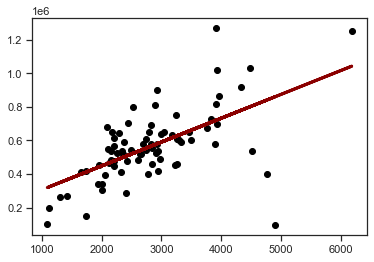

In [126]:
%matplotlib inline

import matplotlib.pyplot as plt

# Plot with matplotlib
plt.scatter(X_train, y_train,  color='black')
plt.plot(X_train, y_pred, color='darkred', linewidth=3);

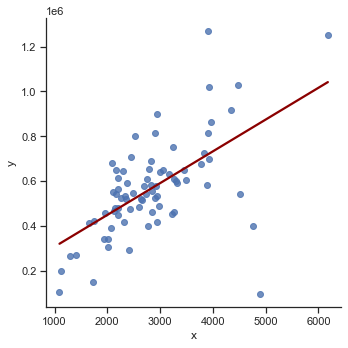

In [127]:
import seaborn as sns 
sns.set_theme(style="ticks")

# Plot with Seaborn

# We first need to create a DataFrame
df_train = pd.DataFrame({'x': X_train['area'], 'y':y_train})

sns.lmplot(x='x', y='y', data=df_train, line_kws={'color': 'darkred'}, ci=False);

In [128]:
import plotly.io as pio
import plotly.offline as py
import plotly.express as px

# Plot with Plotly Express
px.scatter(x=X_train['area'], y=y_train, opacity=0.65, 
                trendline='ols', trendline_color_override='darkred')

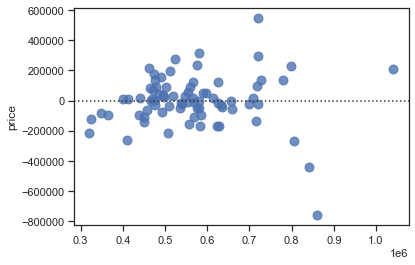

In [129]:
sns.residplot(x=y_pred, y=y_train, scatter_kws={"s": 80});

## Evaluation with test data

In [130]:
y_pred = lm_pipe.predict(X_test)

In [131]:
print('MSE:', mean_squared_error(y_test, y_pred))

print('RMSE:', mean_squared_error(y_test, y_pred, squared=False))

MSE: 23209825917.07576
RMSE: 152347.7138557575


In [132]:
# Plot with Plotly Express
px.scatter(x=X_test['area'], y=y_test, opacity=0.65, 
                trendline='ols', trendline_color_override='darkred')

Model generalization on unseen data (see [plotly documentation](https://plotly.com/python/ml-regression/))


In [133]:
import numpy as np
import plotly.graph_objects as go

x_range = pd.DataFrame({ 'area': np.linspace(X_train['area'].min(), X_train['area'].max(), 100)})
y_range =  lm_pipe.predict(x_range)

go.Figure([
    go.Scatter(x=X_train.squeeze(), y=y_train, name='train', mode='markers'),
    go.Scatter(x=X_test.squeeze(), y=y_test, name='test', mode='markers'),
    go.Scatter(x=x_range.area, y=y_range, name='prediction')
])


# Multiple regression

In [134]:
# Select features for multiple regression
features= [
 'bed',
 'bath',
 'area',
 'year_built',
 'cooling',
 'lot'
  ]
X = df[features]

X.info()
print("Missing values:",X.isnull().any(axis = 1).sum())

# Create response
y = df["price"]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97 entries, 0 to 97
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   bed         97 non-null     int64   
 1   bath        97 non-null     float64 
 2   area        97 non-null     int64   
 3   year_built  97 non-null     int64   
 4   cooling     97 non-null     category
 5   lot         97 non-null     float64 
dtypes: category(1), float64(2), int64(3)
memory usage: 4.8 KB
Missing values: 0


In [135]:
# Data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [136]:
# Create pipeline with model
lm_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('lm', LinearRegression())
                        ])

In [137]:
# show pipeline
set_config(display="diagram")
# Fit model
lm_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f85f4a22df0>),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f85f4a223d0>)])),
                ('lm', LinearRegression())])

In [138]:
# Obtain model coefficients
lm_pipe.named_steps['lm'].coef_

array([ 37501.22436002,  50280.7007969 ,  30312.97805437,  27994.3520344 ,
        79024.39994917,  23467.73502737, -23467.73502737])

Evaluation with test data:

In [139]:
y_pred = lm_pipe.predict(X_test)

In [140]:
r2_score(y_test, y_pred)

0.4825836731448807